In [55]:
import geopandas as gpd
import pandas as pd
import numpy as np
import contextily as cx

In [7]:
df = pd.read_csv(r'C:\DRC\gui_test\0_2_1_1_1_0\cd-0_2_1_1_1_0.csv')

In [14]:
df.columns

Index(['id', 'X_deg', 'Y_deg', 'Region', 'PopStartYear', 'ElecStart',
       'ElecPopCalib', 'Pop2025', 'MinimumOverall2025', 'FinalElecCode2025',
       'NewConnections2025', 'NewCapacity2025', 'InvestmentCost2025',
       'NewDemand2025', 'TotalDemand2025', 'Pop2030', 'MinimumOverall2030',
       'FinalElecCode2030', 'NewConnections2030', 'NewCapacity2030',
       'InvestmentCost2030', 'NewDemand2030', 'TotalDemand2030', 'geometry'],
      dtype='object')

In [42]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.X_deg, df.Y_deg), crs="EPSG:4326")
s = gdf.Pop2030 / 100000

In [67]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World: Afghanistan, Albania, Algeria, American Samoa, Andorra, Angola, Anguilla, Antarctica, Antigua and Barbuda, Argentina, Armenia, Aruba, Australia, Austria, Azerbaijan, Bahamas, Bahrain, Bangladesh, Barbados, Belgium, Belgium, Belize, Benin, Bermuda, Bhutan, Bolivia, Bonaire, Saint Eustasius and Saba, Bosnia and Herzegovina, Botswana, Bouvet Island, Brazil, British Indian Ocean Territory, British Virgin Islands, Brunei Darussalam, Bulgaria, Burkina Faso, Burundi, Cambodia, Cameroon, Canada, Cape Verde, Cayman Islands, Central African Republic, Chad, Chile, China, Christmas Island, Cocos (Keeling) Islands, Comoros, Congo, Cook Islands, Costa Rica, Côte d'Ivoire (Ivory Coast), Croatia, Cuba, Curacao, Cyprus, Czechia, Denmark, Djibouti, Dominica, Dominican Republic, East Timor, Ecuador, Egypt, El Salvador, Equatoria

In [43]:
c = np.where(gdf.FinalElecCode2030 == 1, '#4e53de', '#808080')
c = np.where(gdf.FinalElecCode2030 == 3, '#ffc700', c)
c = np.where(gdf.FinalElecCode2030 == 5, '#e628a0', c)
c = np.where(gdf.FinalElecCode2030 == 6, '#1b8f4d', c)
c = np.where(gdf.FinalElecCode2030 == 6, '#28e66d', c)

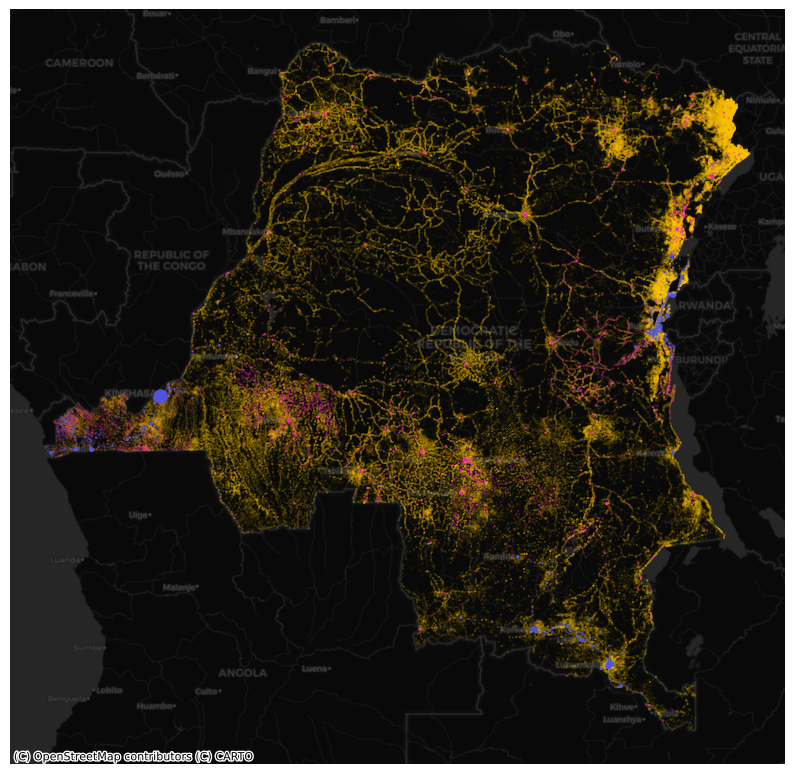

In [65]:
plt = gdf.plot(column='MinimumOverall2030', legend=True, markersize=s, color=c, figsize=(10, 10))
plt.axis('off')
cx.add_basemap(plt, crs=4326, source=cx.providers.CartoDB.DarkMatter)
#plt.figure(figsize=(15, 15))
#plt.figsize=(20,20)
#plt.axis.set_axis_bgcolor("lightslategray")
#plt.xticks([])
#plt.yticks([])

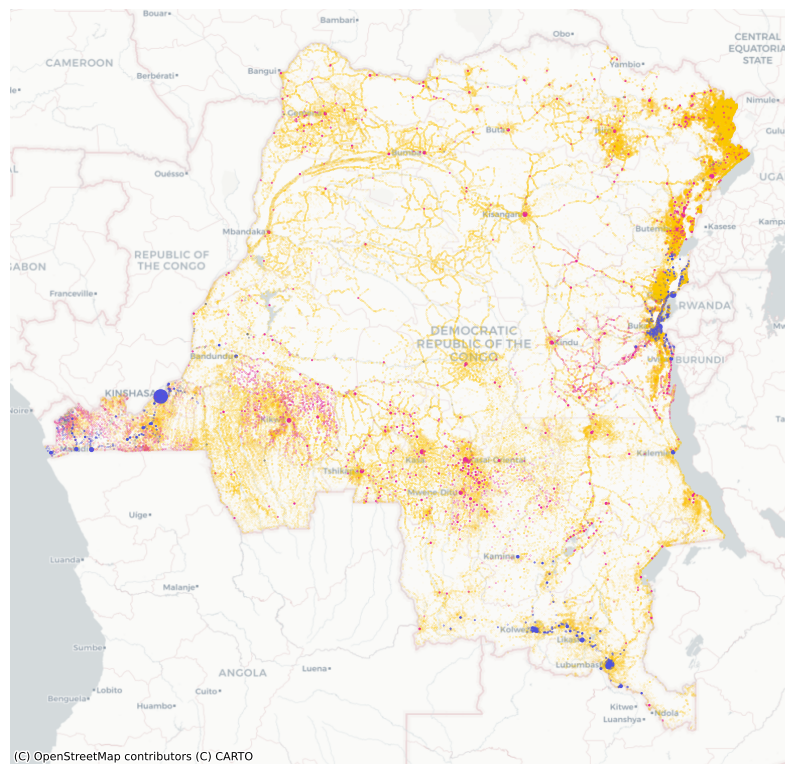

In [66]:
plt = gdf.plot(column='MinimumOverall2030', legend=True, markersize=s, color=c, figsize=(10, 10))
plt.axis('off')
cx.add_basemap(plt, crs=4326, source=cx.providers.CartoDB.Positron)
#plt.figure(figsize=(15, 15))
#plt.figsize=(20,20)
#plt.axis.set_axis_bgcolor("lightslategray")
#plt.xticks([])
#plt.yticks([])

In [68]:
import matplotlib.pyplot as plt

AttributeError: module 'matplotlib.pyplot' has no attribute 'transAxes'

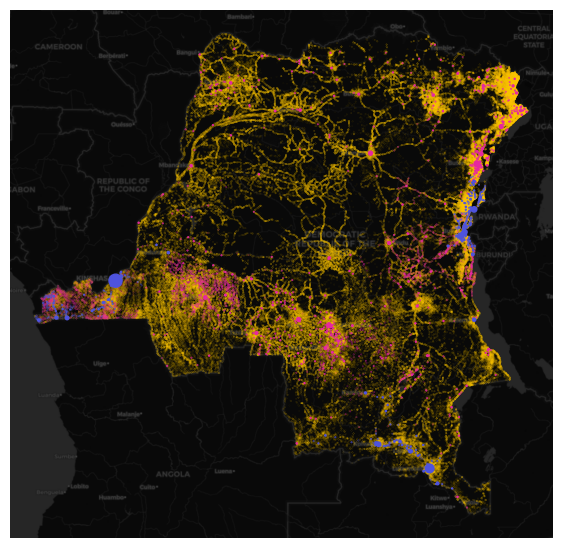

In [84]:
end_year = 2030

figure1 = plt.figure(figsize=(7, 7))
figure1.add_subplot(111)

plt.scatter(df.loc[df['FinalElecCode{}'.format(end_year)] == 3, 'X_deg'],
                     df.loc[df['FinalElecCode{}'.format(end_year)] == 3, 'Y_deg'], color='#ffc700',
                     marker='o',
                    s=(df.loc[df['FinalElecCode{}'.format(end_year)] == 3, 'Pop2030']/100000))

plt.scatter(df.loc[df['FinalElecCode{}'.format(end_year)] == 5, 'X_deg'],
                     df.loc[df['FinalElecCode{}'.format(end_year)] == 5, 'Y_deg'], color='#e628a0',
                     marker='o',
                    s=(df.loc[df['FinalElecCode{}'.format(end_year)] == 5, 'Pop2030']/100000))

plt.scatter(df.loc[df['FinalElecCode{}'.format(end_year)] == 1, 'X_deg'],
                     df.loc[df['FinalElecCode{}'.format(end_year)] == 1, 'Y_deg'], color='#4e53de',
                     marker='o',
                    s=(df.loc[df['FinalElecCode{}'.format(end_year)] == 1, 'Pop2030']/100000))

plt.axis('off')
cx.add_basemap(plt, crs=4326, source=cx.providers.CartoDB.DarkMatter)


In [86]:
(df.X_deg.max()+df.X_deg.min())/2

19.056239

In [89]:
(df.Y_deg.max()+df.Y_deg.min())/2

-4.136591749999999

In [90]:
colors = {1: '#4e53de',
                  3: '#ffc700',
                  5: '#e628a0',
                  6: '#1b8f4d',
                  7: '#28e66d',
                  99: '#808080'}

In [92]:
for key in colors.keys():
    print(key, colors[key])

1 #4e53de
3 #ffc700
5 #e628a0
6 #1b8f4d
7 #28e66d
99 #808080
